In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

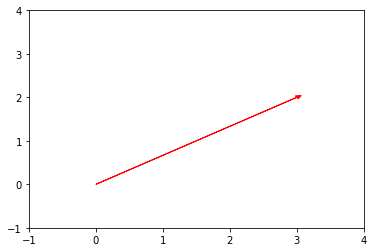

In [0]:
a = [3,2]

plt.arrow(0,0, a[0], a[1],head_width=.08, head_length=0.08, color ='red')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
b = np.array([17, -4, -2, -1])

np.linalg.norm(b)

#The norm represents the length of the vector.

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c = [3,7,-2,12]
d = [9,-7,4,6]

np.dot(c,d)

#They are not orthogonal because their dot product is not zero.

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])

E_1 = np.linalg.matrix_power(E,-1)
E_1

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [67]:
E_T = E.T

E_T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [65]:
# One thing that can lead to a matrix having a determinant of 0 is if two rows or columns in the matrix are perfectly collinear.
F = ([[2,-2,5],
      [4,1,10],
      [12,6,30]])
np.linalg.det(F)

0.0

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, sample variance, and sample standard deviation for both the number of customers and inches of new snow for the week. Remember that on SCs you can use library functions, dataframes, .describe(), etc. 



In [0]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'Customers': customers, 'Snow': snow})
df.head()

,Customers,Snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
np.std(df, ddof=1)

Customers    314.264069
Snow           2.927700
dtype: float64

In [0]:
np.var(df, ddof=1)

Customers    98761.904762
Snow             8.571429
dtype: float64

In [0]:
np.mean(df)

Customers    1135.714286
Snow            2.714286
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#No because they are squared and therefore exaggerated making them incomparable without standardization.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
df.cov()

,Customers,Snow
Customers,98761.904762,670.238095
Snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.00,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,94.250000,245.25,706.000000,130.500000,205.250000,154.25000,798.250000,208.000000,457.750000,202.000000,349.000000,967.500000,1502.500000,57.500000,1427.000000,360.750000,55.250000
std,18.856917,16.50,93.427334,29.557853,22.366269,15.47848,200.755863,60.188592,92.471167,13.735599,15.769168,210.612599,54.659552,11.120552,140.612944,156.712848,10.436315
min,66.000000,227.00,586.000000,93.000000,184.000000,139.00000,566.000000,143.000000,355.000000,187.000000,334.000000,674.000000,1462.000000,47.000000,1256.000000,135.000000,41.000000
25%,93.750000,238.25,660.250000,114.750000,190.750000,145.00000,681.500000,164.000000,402.250000,195.250000,336.250000,886.250000,1469.500000,51.500000,1344.500000,315.000000,50.750000
50%,103.000000,243.50,717.500000,134.500000,201.000000,151.50000,797.000000,212.000000,453.000000,200.500000,348.500000,1029.500000,1483.000000,55.000000,1440.000000,416.500000,58.000000
75%,103.500000,250.50,763.250000,150.250000,215.500000,160.75000,913.750000,256.000000,508.500000,207.250000,361.250000,1110.750000,1516.000000,61.000000,1522.500000,462.250000,62.500000
max,105.000000,267.00,803.000000,160.000000,235.000000,175.00000,1033.000000,265.000000,570.000000,220.000000,365.000000,1137.000000,1582.000000,73.000000,1572.000000,475.000000,64.000000


In [0]:
df_copy = df
df_copy['Country'] = df_copy['Country'].astype('category')
df_copy['Country'] = df_copy['Country'].cat.codes
df.head(10)

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,3,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,1,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
##### Your Code Here #####
scaler = StandardScaler()
Z = scaler.fit_transform(df_copy)
print("\n Standardized Data: \n", Z)


 Standardized Data: 
 [[-1.34164079  0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919
   0.13055067 -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723
   0.73740709 -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 1.34164079  0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947
   1.54795798  0.43569619  1.09352832  1.40168163  0.08406627  1.17160324
   0.9292974   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.4472136   0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105
  -0.54085279 -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243
  -0.0575671  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-0.4472136  -1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077
  -1.13765587  1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804
  -1.60913739 -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]


In [0]:
np.mean(Z)

0.0

In [0]:
np.std(Z)

1.0

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. 

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

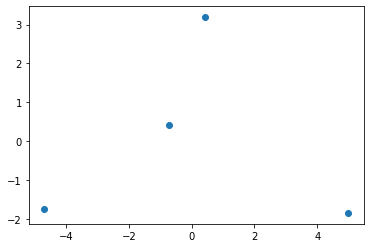

In [0]:
##### Your Code Here #####
pca = PCA(3)
pca.fit(Z)
fit_transform = pca.transform(Z)
transform_data_frame = pd.DataFrame(fit_transform)
plt.scatter(fit_transform[:,0], fit_transform[:,1])
plt.show()

In [0]:
fit_transform

array([[-0.70881064,  0.40794148],
       [-4.68907411, -1.75426016],
       [ 0.4104962 ,  3.20114957],
       [ 4.98738856, -1.85483089]])

## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.

An Eigenvalue is what we use to scale the Eigenvector. The Eigenvector is the vector that remains the same in direction, it can be scaled by the Eigenvalue but its orientation is constant.

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points_copy = points
points_copy.head()


,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
kmeans = KMeans(4)
X = points_copy.values
kmeans.fit(X)
points_copy['cluster'] = kmeans.labels_
points_copy

,x,y,cluster
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0
...,...,...,...
195,-3.560689,4.567320,1
196,5.051216,4.745086,2
197,6.127624,4.285188,2
198,-1.783078,-8.890394,0


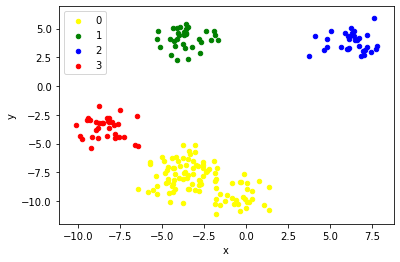

In [0]:
fig, ax = plt.subplots()
colors = {0:'yellow', 1:'green', 2:'blue', 3:'red'}
grouped = points_copy.groupby('cluster')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show() 

#from the eyeball test it appears k = 4

In [0]:
centroids = kmeans.cluster_centers_
centroids

array([[-2.73359305e+00, -8.20435304e+00,  8.88178420e-16],
       [-3.59740679e+00,  4.13344099e+00,  1.00000000e+00],
       [ 6.24979318e+00,  3.84457183e+00,  1.00000000e+00],
       [-8.36652987e+00, -3.61238083e+00,  0.00000000e+00]])

In [0]:
cc_df = pd.DataFrame(centroids)

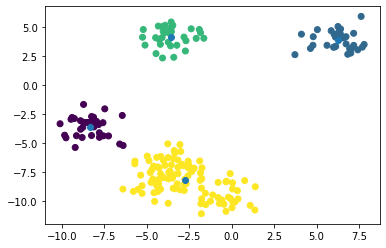

In [0]:
features = ['x', 'y']

kmeans = KMeans(n_clusters=4)
kmeans.fit(points_copy[features].values)
labels = kmeans.labels_

plt.scatter(points_copy[features[0]], points_copy[features[1]], c=labels)
            
plt.scatter(cc_df[0],cc_df[1])

plt.show()

# Stretch Goals (AKA how to get a 3):

Complete the stretch goals for each section in order to get a 3 on that section.

## Parts 1 & 2 (do all of the following): 
  - Comment your code well with both markdown and inline comments where appropriate
  - Show your work with code and possibly LaTeX 
  - Justify your answers particularly well to show advanced mastery of this section

## Part 3 (do all of the following): 
 - Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)
    - If you want to include a the cumulative proportion of explained variance, you might be interested in this NumPy Function: [numpy.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
 - Give a top-notch explanation of eigenvalues and eigenvectors. Feel free to any materials, images, code, graphs, LaTeX, etc. to spruce up your answer.

## Part 4 (do all of the following):
- Justify your choice of k, both visually (scatterplot) and mathematically (elbow plot).